## This notebook create the AMOC figure

In [1]:
#No change needs here

'''Define PMIP model list'''
# This cell lists CMIP/PMIP model groups

pmip_v4='PMIP4'
pmip_v3='PMIP3'
pmip={}
pmip['PMIP4']=['AWI-CM-1-1-LR',
               'CESM2',
               'EC-EARTH-3-3',
               'FGOALS-f3-L',
               'FGOALS-g3',
               'GISS-E2-1-G',
               'HadGEM3-GC31',
               'IPSL-CM6A-LR',
               'MIROC-ES2L',
               'MPI-ESM1-2-LR',
               'MRI-ESM2-0',
               'NESM3',
               'NorESM1-F',
               'NorESM2',
               'UofT-CCSM-4']
pmip['PMIP3']=['BCC-CSM1-1',
               'CCSM4',
               'CNRM-CM5',
               'CSIRO-Mk3L-1-2',
               'CSIRO-Mk3-6-0',
               'EC-EARTH-2-2',
               'FGOALS-g2',
               'FGOALS-s2',
               'GISS-E2-R',
               'HadGEM2-CC',
               'HadGEM2-ES',
               'IPSL-CM5A-LR',
               'KCM1-2-2',
               'MIROC-ESM',
               'MPI-ESM-P',
               'MRI-CGCM3']
               
               
         

In [2]:
#import packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xesmf as xe
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import xlrd
import os
import matplotlib.colors as colors
import seaborn as sns
import scipy
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.collections as collections
import regionmask



In [4]:
#load AMOC data
df= pd.read_csv('amoc/amoc.csv',skipinitialspace=True,header=0)  

In [4]:
df

,Model,MIROC-ES2L,CCSM4,CESM2,FGOALS-g2,GISS-E2-1-G,MPI-ESM-P,MRI-CGCM3
0,piControl_30N,13.87304,20.7727,19.0620,23.3543,24.7605,19.3058,13.7694
1,midHolocene_30N,14.74721,20.5321,19.6255,23.0021,24.8883,19.8271,14.5530
2,piControl_50N,12.25497,16.6698,16.5600,17.8379,15.3620,16.3581,14.5778
3,midHolocene_50N,13.12272,16.2000,16.8675,17.5562,15.2235,16.5716,15.5096


In [5]:
#Create dataset used in plotting
amoc3={}
amoc4={}
m3=[]
m4=[]
models=['CCSM4','CESM2','FGOALS-g2','GISS-E2-1-G','MPI-ESM-P','MRI-CGCM3','MIROC-ES2L']
for m in models:
    if m in pmip[pmip_v3]:
        m3.append(m)
        amoc3[m]=df[m]
    if m in pmip[pmip_v4]:
        amoc4[m]=df[m]
        m4.append(m)

In [8]:
amoc3

{'CCSM4': 0    20.7727
 1    20.5321
 2    16.6698
 3    16.2000
 Name: CCSM4, dtype: float64, 'FGOALS-g2': 0    23.3543
 1    23.0021
 2    17.8379
 3    17.5562
 Name: FGOALS-g2, dtype: float64, 'MPI-ESM-P': 0    19.3058
 1    19.8271
 2    16.3581
 3    16.5716
 Name: MPI-ESM-P, dtype: float64, 'MRI-CGCM3': 0    13.7694
 1    14.5530
 2    14.5778
 3    15.5096
 Name: MRI-CGCM3, dtype: float64}

In [9]:
amoc4

{'CESM2': 0    19.0620
 1    19.6255
 2    16.5600
 3    16.8675
 Name: CESM2, dtype: float64, 'GISS-E2-1-G': 0    24.7605
 1    24.8883
 2    15.3620
 3    15.2235
 Name: GISS-E2-1-G, dtype: float64, 'MIROC-ES2L': 0    13.87304
 1    14.74721
 2    12.25497
 3    13.12272
 Name: MIROC-ES2L, dtype: float64}

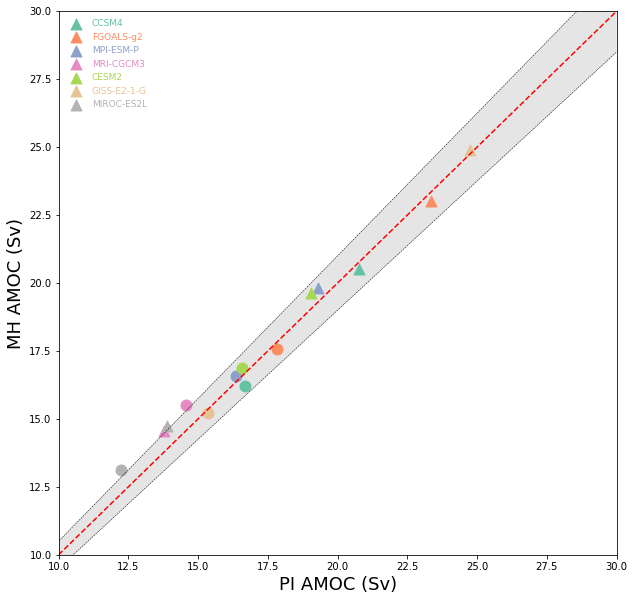

In [7]:
#Plotting
plt.figure(figsize=(10,10))
plt.xlim(10,30)
plt.ylim(10,30)
#Create reference line and shading
x1=np.arange(10,31)
y1=x1
y2=0.95*x1
y3=1.05*x1
plt.plot(x1,y1,"r--")
plt.plot(x1,y2,"k--",lw=0.5)
plt.plot(x1,y3,"k--",lw=0.5)
plt.fill_between(x1, y2, y3,facecolor='k', alpha=0.1)
#Set point colors 
colormap = plt.get_cmap('Set2') #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(models))] 
#plotting    
for i in range(len(m3)):
    plt.scatter(amoc3[m3[i]][0],amoc3[m3[i]][1],s=120,color=colorst[i],marker='^',label=m3[i])
    plt.scatter(amoc3[m3[i]][2],amoc3[m3[i]][3],s=120,color=colorst[i],marker='o')           
for i in range(len(m4)):
    plt.scatter(amoc4[m4[i]][0],amoc4[m4[i]][1],s=120,color=colorst[i+len(m3)],marker='^',label=m4[i])
    plt.scatter(amoc4[m4[i]][2],amoc4[m4[i]][3],s=120,color=colorst[i+len(m3)],marker='o')
#legend
leg=plt.legend(edgecolor='None',facecolor='None',fontsize=9)
for h, t in zip(leg.legendHandles, leg.get_texts()):
    t.set_color(h.get_facecolor()[0])
#axis labels
plt.xlabel('PI AMOC (Sv)',fontsize=18)
plt.ylabel('MH AMOC (Sv)',fontsize=18)
#save plot
plt.savefig('figs/AMOC.png')

